### Initialisation

In [1]:
library(RnmrQuant1D)

# Create a new RnmrQuant1D instance 
rq1d <- RnmrQuant1D$new()

# Path of the QC-QS spectra directory 
rq1d$QSDIR <- 'C:/DATA/500_AD/QC-QS'

# NMR sequence
rq1d$SEQUENCE <- 'noesy'

# Read the calibration profile
STDS_FILE <- 'C:/DATA/500_AD/standards-QC-QS.txt'
rq1d$CALIBRATION <- data.frame(read.table(STDS_FILE, header=T, sep="\t", dec=".", stringsAsFactors=F))

# QC & QS names
QSname <- 'GLBBI_RB_AJdos-S13_QR20'
QCname <- 'GLBBI_RB_AJdos-S13_QC20'

# Check if all input data are OK
rq1d$check_calibration(QCname, QSname, verbose=TRUE)

OK: C:/DATA/500_AD/QC-QS contains some Bruker spectra acquired with a noesy sequence
OK: the standard profile format seems correct
OK: some spectra under C:/DATA/500_AD/QC-QS correspond to GLBBI_RB_AJdos-S13_QC20
OK: some spectra under C:/DATA/500_AD/QC-QS correspond to GLBBI_RB_AJdos-S13_QR20


### Processing

PULCON Factor for QS
GLBBI_RB_AJdos-S13_QR20 / noesy ...


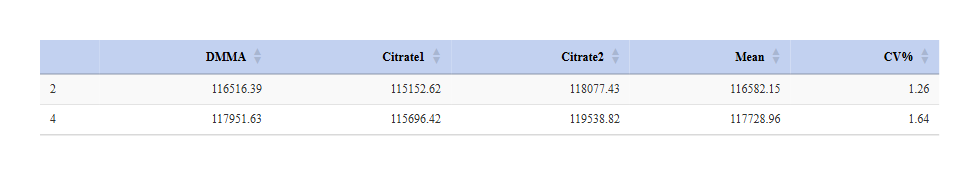

$mean
[1] 117155.6

$CV
[1] 0.69


PULCON Factor for QC
GLBBI_RB_AJdos-S13_QC20 / noesy ...


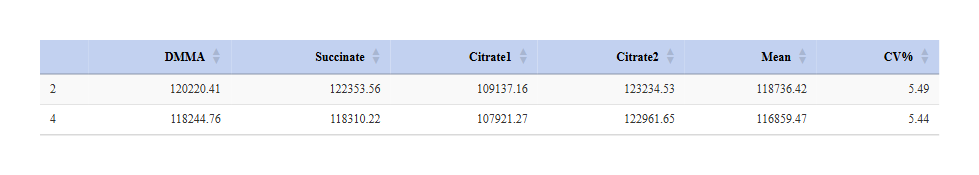

$mean
[1] 117797.9

$CV
[1] 1.13


Quality Control for noesy sequence
R-squared = 0.993 
Rate = 0.9782 , Intercept = 0.032 


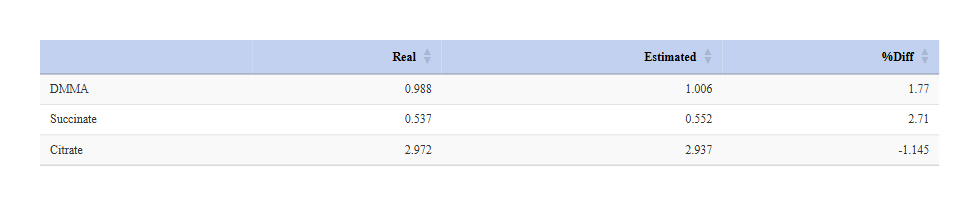

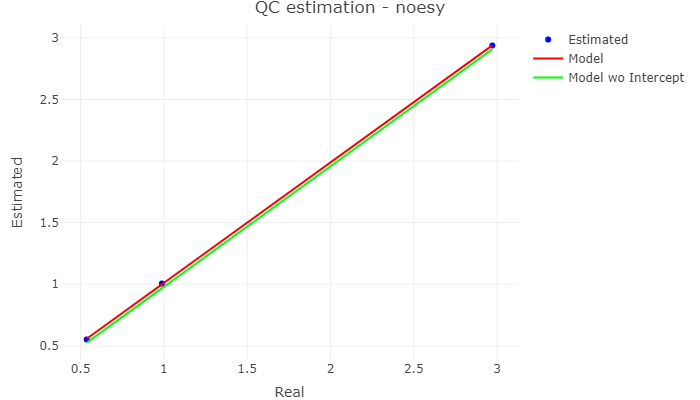

In [2]:
rq1d$OUTTYPE <- "png"

cat("PULCON Factor for QS\n")
QS <- rq1d$get_response_factors(rq1d$QStype, QSname, thresfP=6, deconv=TRUE, verbose=1)
rq1d$displayTable(rq1d$get_factor_table(QS), nbdec=2)
QS$fPUL
cat("\n")

#---------------------

cat("PULCON Factor for QC\n")
QC <- rq1d$get_response_factors(rq1d$QCtype, QCname, thresfP=6, deconv=TRUE, verbose=1)
rq1d$displayTable(rq1d$get_factor_table(QC), nbdec=2)
QC$fPUL
cat("\n")

#---------------------

QC_tab <- rq1d$get_QC_estimation(QC, QS)
fig <- rq1d$plot_QC_estimation(QC_tab)

rq1d$displayTable(QC_tab, nbdec=3)
rq1d$displayWidget(fig, width='auto')